In [6]:
import os
import argparse
import gym
import numpy as np
import torch
import torch.cuda
import torch.multiprocessing as _mp

from utils.font_color import color
from models.actor_critic import ActorCritic
from common.atari_wrapper import create_mario_env
from optimizer.sharedadam import SharedAdam
from trainer.a3c.train import train, test
from common.mario_actions import ACTIONS


In [7]:
env_name='SuperMarioBrosNoFrameskip-1-1-v0'
save_path='.//save/trained-models/1-1-basic-reward.pkl'

In [9]:
env = create_mario_env(env_name, reward_type='pen_pos')
shared_model = ActorCritic(
        env.observation_space.shape[0], len(ACTIONS))

shared_model.share_memory()
shared_model.load_state_dict(torch.load(save_path))


In [11]:
from gym.wrappers import Monitor

# env = Monitor(env, './video/')

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

FloatTensor = torch.FloatTensor

cx = Variable(torch.zeros(1, 512),  requires_grad=True ).type(FloatTensor)
with torch.no_grad(): cx=cx
hx = Variable(torch.zeros(1, 512),  requires_grad=True).type(FloatTensor)
with torch.no_grad(): hx=hx

In [13]:
# state = env.reset()
# state = torch.from_numpy(state)
# with torch.no_grad(): state_inp = Variable(state.unsqueeze(0)).type(FloatTensor)
    
# for step in range(1000):
#     value,action, (hx,cx) = shared_model.forward((state_inp,(hx,cx))) 
#     action = np.argmax(action.data.numpy())
#     state, reward, done, info = env.step(action)
#     state = torch.from_numpy(state)
#     with torch.no_grad():
#         state_inp = Variable(state.unsqueeze(0)).type(FloatTensor)

#     env.render()
#     if done : break

# env.close()

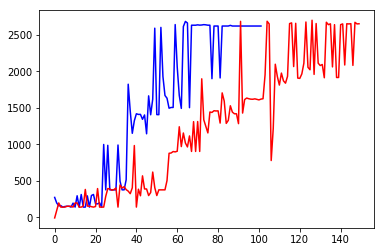

In [14]:
import pandas as pd  
import matplotlib.pyplot as plt 
df = pd.read_csv('./save/trained-models/curiosity/mario_curves.csv')
df2 = pd.read_csv('./save/trained-models/default/mario_curves.csv')
# df = df.drop(df.loc[df['Total Reward'] == 'Total Reward' ].index)
df2 = df2.drop(df2.loc[df2['Total Reward'] == 'Total Reward' ].index)
df['Total Reward'] = df['Total Reward'].astype(float)
df2['Total Reward'] = df2['Total Reward'].astype(float)
plt.plot(df['Total Reward'], c ='blue')
plt.plot(df2['Total Reward'], c ='red')

plt.show()

In [15]:
import glob 
path ='./save/' # use your path
default = glob.glob(path + "default/train*.csv")
curiosity = glob.glob(path + "curiosity/train*.csv")


In [16]:
list_ = []

for file_ in curiosity:
    df = pd.read_csv(file_, header=None)
    list_.append(df)

frame_cur = pd.concat(list_, axis = 1, ignore_index = True)

In [17]:
list_ = []

for file_ in default:
    df = pd.read_csv(file_, header=None)
    list_.append(df)

frame_def = pd.concat(list_, axis = 1, ignore_index = True)

In [18]:
means_cur = np.nanmean(frame_cur.values, axis=1)
std_cur = np.nanstd(frame_cur.values, axis=1)
maxi_cur = np.nanmax(frame_cur.values, axis=1)
mini_cur = np.nanmin(frame_cur.values, axis=1)
n_itr_cur = frame_cur.shape[0]

In [19]:
means_def = np.nanmean(frame_def.values, axis=1)
std_def = np.nanstd(frame_def.values, axis=1)
maxi_def = np.nanmax(frame_def.values, axis=1)
mini_def = np.nanmin(frame_def.values, axis=1)
n_itr_def = frame_def.shape[0]

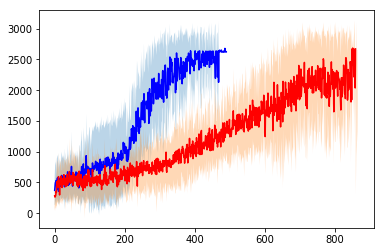

In [20]:
plt.plot(means_cur, color='blue')
plt.fill_between(np.arange(n_itr_cur), means_cur + std_cur, means_cur - std_cur , alpha=0.3 )
plt.plot(means_def[:-10], color='red')
plt.fill_between(np.arange(n_itr_def), means_def + std_def, means_def - std_def , alpha=0.3 )
plt.show()